# Bagging Machine Learning


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df = df[['age', 'pclass', 'sex', 'survived']]
df.dropna(inplace=True)
df.shape

(714, 4)

In [5]:
df['pclass'].unique()

array([3, 1, 2])

In [6]:
df['pclass'].value_counts()

3    355
1    186
2    173
Name: pclass, dtype: int64

In [7]:
df['sex'].unique()

array(['male', 'female'], dtype=object)

In [8]:
df['sex'].value_counts()

male      453
female    261
Name: sex, dtype: int64

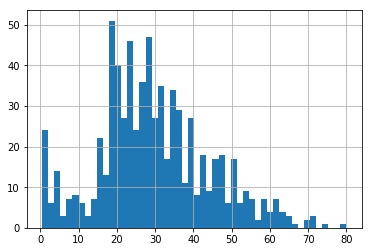

In [9]:
df['age'].hist(bins=50)

In [10]:
X = df[['pclass', 'sex', 'age']]

In [11]:
y = df['survived']

In [12]:
from sklearn.preprocessing import LabelBinarizer
le = LabelBinarizer()

In [13]:
X['sex'] = le.fit_transform(X['sex'])

/home/jatin/anaconda3/envs/decision_tree/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
X.head()

,pclass,sex,age
0,3,1,22.0
1,1,0,38.0
2,3,0,26.0
3,1,0,35.0
4,3,1,35.0


In [15]:
X.shape

(714, 3)

In [16]:
X.describe()

,pclass,sex,age
count,714.000000,714.000000,714.000000
mean,2.236695,0.634454,29.699118
std,0.838250,0.481921,14.526497
min,1.000000,0.000000,0.420000
25%,1.000000,0.000000,20.125000
50%,2.000000,1.000000,28.000000
75%,3.000000,1.000000,38.000000
max,3.000000,1.000000,80.000000


In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 3 columns):
pclass    714 non-null int64
sex       714 non-null int64
age       714 non-null float64
dtypes: float64(1), int64(2)
memory usage: 42.3 KB


## Fit Model

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [21]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [22]:
def print_score(clf, X_train, X_test, y_train, y_test, train = True):
#     print accuracy score, classification report, confusion metrics
    if train:
#         training performance
        print('Train Result : \n')
        print('Accuracy Score {0:.4f}\n'.format(accuracy_score(y_train, clf.predict(X_train))))
        print('Classification Report : \n {} \n'.format(classification_report(y_train, clf.predict(X_train))))
        print('Confusion Metrics : \n {} \n'.format(confusion_matrix(y_train, clf.predict(X_train))))
        
        res = cross_val_score(clf, X_train, y_train, cv = 10, scoring='accuracy')
        print('Average Accuracy : {0:.4f}\n'.format(np.mean(res)))
        print('Accuracy SD : {0:.4f}\n'.format(np.std(res)))
        
    elif train == False:
#         test performance
        print('Test Result : \n')
        print('Accuracy Score {0:.4f}\n'.format(accuracy_score(y_test, clf.predict(X_test))))
        print('Classification Report : \n {}\n'.format(classification_report(y_test, clf.predict(X_test))))
        print('Confusion Metrics : \n {} \n'.format(confusion_matrix(y_test, clf.predict(X_test))))
        

## Decision Tree

In [23]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [24]:
print_score(clf, X_train, X_test, y_train, y_test, train=True)

Train Result : 

Accuracy Score 0.9158

Classification Report : 
              precision    recall  f1-score   support

          0       0.90      0.97      0.93       298
          1       0.95      0.84      0.89       201

avg / total       0.92      0.92      0.91       499
 

Confusion Metrics : 
 [[289   9]
 [ 33 168]] 

Average Accuracy : 0.8016

Accuracy SD : 0.0363



In [25]:
print_score(clf, X_train, X_test, y_train, y_test, train=False)

Test Result : 

Accuracy Score 0.7767

Classification Report : 
              precision    recall  f1-score   support

          0       0.78      0.86      0.82       126
          1       0.77      0.66      0.71        89

avg / total       0.78      0.78      0.77       215


Confusion Metrics : 
 [[108  18]
 [ 30  59]] 



***

## Bagging (OOB = False)

In [26]:
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=1000, bootstrap=True, n_jobs=-1, random_state=42)

In [27]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=1000, n_jobs=-1, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

In [28]:
print_score(bag_clf, X_train, X_test, y_train, y_test, train=True)

Train Result : 

Accuracy Score 0.9158

Classification Report : 
              precision    recall  f1-score   support

          0       0.91      0.96      0.93       298
          1       0.93      0.85      0.89       201

avg / total       0.92      0.92      0.92       499
 

Confusion Metrics : 
 [[286  12]
 [ 30 171]] 

Average Accuracy : 0.8056

Accuracy SD : 0.0457



In [29]:
print_score(bag_clf, X_train, X_test, y_train, y_test, train=False)

Test Result : 

Accuracy Score 0.7860

Classification Report : 
              precision    recall  f1-score   support

          0       0.80      0.85      0.82       126
          1       0.77      0.70      0.73        89

avg / total       0.78      0.79      0.78       215


Confusion Metrics : 
 [[107  19]
 [ 27  62]] 



***

## Bagging (OOB = True)

use out-of-bag samples to estimate the generalization accuracy

In [30]:
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=1000, bootstrap=True, oob_score=True, n_jobs=-1, random_state=42)

In [31]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=1000, n_jobs=-1, oob_score=True,
         random_state=42, verbose=0, warm_start=False)

In [32]:
bag_clf.oob_score_

0.8196392785571143

In [33]:
print_score(bag_clf, X_train, X_test, y_train, y_test, train=True)

Train Result : 

Accuracy Score 0.9158

Classification Report : 
              precision    recall  f1-score   support

          0       0.91      0.96      0.93       298
          1       0.93      0.85      0.89       201

avg / total       0.92      0.92      0.92       499
 

Confusion Metrics : 
 [[286  12]
 [ 30 171]] 

Average Accuracy : 0.8056

Accuracy SD : 0.0457



In [34]:
print_score(bag_clf, X_train, X_test, y_train, y_test, train=False)

Test Result : 

Accuracy Score 0.7860

Classification Report : 
              precision    recall  f1-score   support

          0       0.80      0.85      0.82       126
          1       0.77      0.70      0.73        89

avg / total       0.78      0.79      0.78       215


Confusion Metrics : 
 [[107  19]
 [ 27  62]] 

